In [ ]:
# Part 1
# Use pandas and matplotlib to analyze variables individually. 
# Decide whether the variable is significant to exam pass rate.

In [113]:
# Preparation 
import pandas as pd
dt = pd.read_csv('BC_driver_license_test.csv', low_memory=False)

In [114]:
dt.head()

,test_id,driver_exam_breakdown,year,exam_month,exam_reason,exam_result,exam_type,gender,office_municiplaity,region,exam_class,exam_date
0,0,Class 6,2017,May,Re-test,Failed,Motorcycle Skills,Male,SURREY,Lower Mainland,6,2017-05-09
1,1,Class 6,2017,May,Re-test,Failed,Motorcycle Skills,Male,SURREY,Lower Mainland,6,2017-05-09
2,2,Class 6,2017,May,Re-test,Passed,Motorcycle Skills,Female,PORT HARDY,Vancouver Island,6,2017-05-09
3,3,Class 6,2017,May,Re-test,Passed,Motorcycle Skills,Male,SURREY,Lower Mainland,6,2017-05-09
4,4,Class 6,2017,May,Re-test,Passed,Motorcycle Skills,Male,SURREY,Lower Mainland,6,2017-05-09


In [115]:
print(dt.dtypes)

test_id                   int64
driver_exam_breakdown    object
year                     object
exam_month               object
exam_reason              object
exam_result              object
exam_type                object
gender                   object
office_municiplaity      object
region                   object
exam_class                int64
exam_date                object
dtype: object


In [116]:
dt.isnull().sum()

test_id                  0
driver_exam_breakdown    0
year                     0
exam_month               0
exam_reason              0
exam_result              0
exam_type                0
gender                   0
office_municiplaity      0
region                   0
exam_class               0
exam_date                0
dtype: int64

In [117]:
dt.isna().sum()

test_id                  0
driver_exam_breakdown    0
year                     0
exam_month               0
exam_reason              0
exam_result              0
exam_type                0
gender                   0
office_municiplaity      0
region                   0
exam_class               0
exam_date                0
dtype: int64

In [118]:
dt.shape

(1417534, 12)

In [ ]:
# Variable 1: driver_exam_breakdown

In [119]:
driver_exam_breakdown = dt.groupby('driver_exam_breakdown')['exam_result'].value_counts()
passed = driver_exam_breakdown[driver_exam_breakdown.index.get_level_values('exam_result') == 'Passed'].groupby('driver_exam_breakdown').sum()
failed = driver_exam_breakdown[driver_exam_breakdown.index.get_level_values('exam_result') == 'Failed'].groupby('driver_exam_breakdown').sum()
total = passed + failed
pass_rate = passed / total
pass_rate

driver_exam_breakdown
Class 1    0.548903
Class 2    0.804336
Class 3    0.751538
Class 4    0.499804
Class 5    0.539121
Class 6    0.721945
Class 7    0.462481
Class 8    0.703152
Name: exam_result, dtype: float64

In [120]:
mean = pass_rate.mean()
var = pass_rate.var()

print("Mean: ", mean)
print("variance: ", var)

Mean:  0.6289098978119538
Variation:  0.016972821292618703


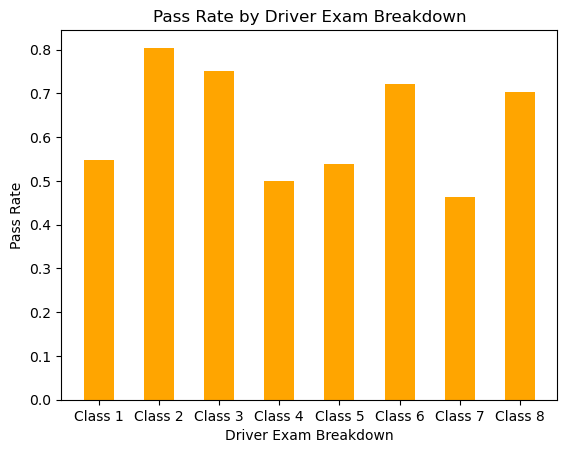

In [121]:
import matplotlib.pyplot as plt

x = pass_rate.index
y = pass_rate.values

plt.bar(x, y, width=0.5, color='orange')

plt.title('Pass Rate by Driver Exam Breakdown')
plt.xlabel('Driver Exam Breakdown')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by Driver Exam Breakdown, Class 2 seems to have the highest pass rate while Class 7 has the lowest pass rate.
# Mean is 0.6289 and variance is 0.0169. The variance is more than 0,001, different classes matter to pass rate.
# So the driver_exam_breakdown variable is significant to pass rate.
# We will include this variable to our machine learning process in part 2

In [ ]:
#Variable 2: year

In [122]:
year = dt.groupby('year')['exam_result'].value_counts()
passed2 = year[year.index.get_level_values('exam_result') == 'Passed'].groupby('year').sum()
failed2 = year[year.index.get_level_values('exam_result') == 'Failed'].groupby('year').sum()
total = passed2 + failed2
pass_rate2 = passed2 / total
pass_rate2

year
2017                    0.498263
2018                    0.501274
2019                    0.508364
2020                    0.531064
2021                    0.536732
2022 (up to June 30)    0.525319
Name: exam_result, dtype: float64

In [147]:
mean2 = pass_rate2.mean()
var2 = pass_rate2.var()

print("Mean: ", mean2)
print("variance: ", var2)

Mean:  0.5168360684670521
variance:  0.0002658314580313442


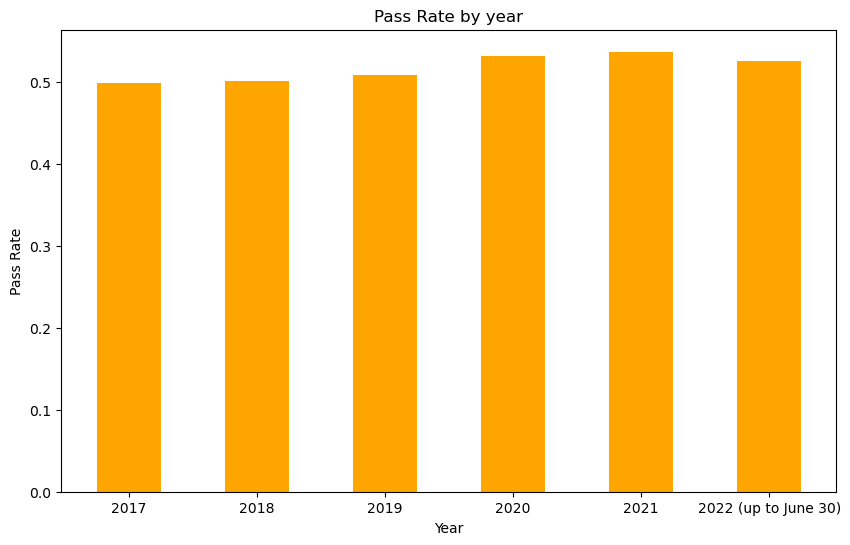

In [124]:
import matplotlib.pyplot as plt

x = pass_rate2.index
y = pass_rate2.values
fig = plt.figure(figsize=(10, 6))

plt.bar(x, y, width=0.5, color='orange')

plt.title('Pass Rate by year')
plt.xlabel('Year')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by year, there is no significant difference from 2017 to 2022.
# Mean is 0.5168 and variance is 0.0002. The variance is less than 0,001, different years does not matter to pass rate.
# So the year variable is NOT significant to pass rate.
# We will NOT include this variable to our machine learning process in part 2

In [ ]:
#Variable 3: exam_month

In [125]:
exam_month = dt.groupby('exam_month')['exam_result'].value_counts()
passed = exam_month[exam_month.index.get_level_values('exam_result') == 'Passed'].groupby('exam_month').sum()
failed = exam_month[exam_month.index.get_level_values('exam_result') == 'Failed'].groupby('exam_month').sum()
total = passed + failed
pass_rate3 = passed / total
pass_rate3

exam_month
April        0.521851
August       0.539279
December     0.505083
February     0.501487
January      0.506761
July         0.533553
June         0.525900
March        0.509863
May          0.526720
November     0.505586
October      0.511031
September    0.515881
Name: exam_result, dtype: float64

In [126]:
mean3 = pass_rate3.mean()
var3 = pass_rate3.var()

print("Mean: ", mean3)
print("variance: ", var3)

Mean:  0.5169162376750077
Variation:  0.00015209983206017377


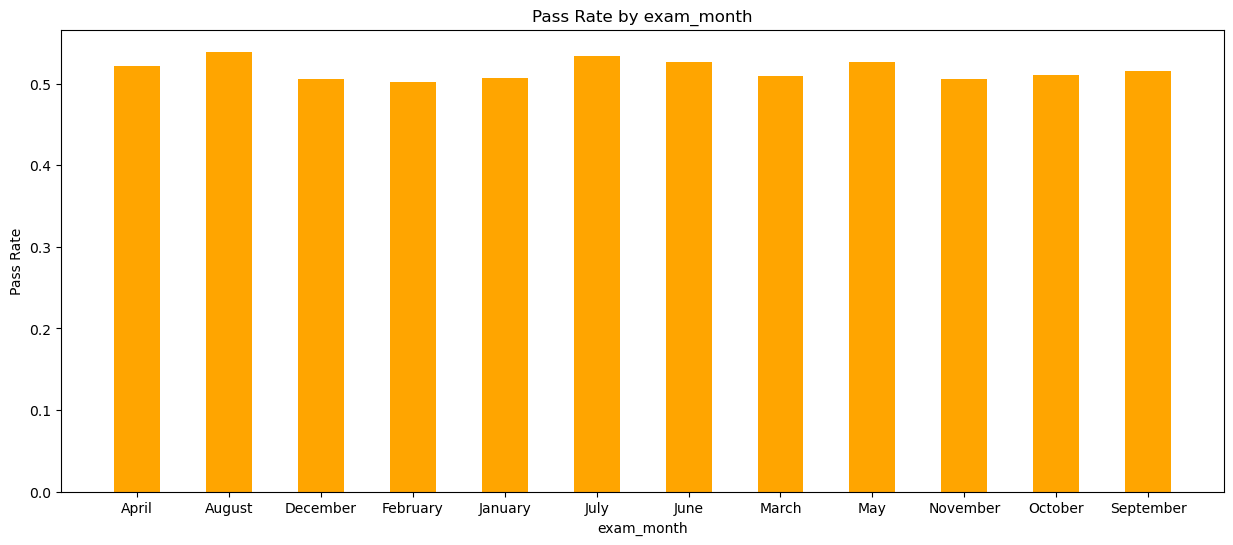

In [127]:
import matplotlib.pyplot as plt

x = pass_rate3.index
y = pass_rate3.values
fig = plt.figure(figsize=(15, 6))

plt.bar(x, y, width=0.5, color='orange')

plt.title('Pass Rate by exam_month')
plt.xlabel('exam_month')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by exam_month, there is no significant difference across different months.
# Mean is 0.5169 and variance is 0.0001. The variance is less than 0,001, different months does not matter to pass rate.
# So the year variable is NOT significant to pass rate. 
# However, for machine learning purpose, we still include exam_month as a variable.

In [ ]:
#Variable 4: exam_reason

In [128]:
exam_reason = dt.groupby('exam_reason')['exam_result'].value_counts()
passed = exam_reason[exam_reason.index.get_level_values('exam_result') == 'Passed'].groupby('exam_reason').sum()
failed = exam_reason[exam_reason.index.get_level_values('exam_result') == 'Failed'].groupby('exam_reason').sum()
total = passed + failed
pass_rate4 = passed / total
pass_rate4

exam_reason
Class Change                 0.662038
Downgrade                    0.813725
Information not available    0.545194
New Licence                  0.200000
Original                     0.446355
Re-exam                      0.512493
Re-test                      0.792623
Restriction Change           0.409556
Upgrade                      0.622214
Name: exam_result, dtype: float64

In [129]:
mean4 = pass_rate4.mean()
var4 = pass_rate4.var()

print("Mean: ", mean4)
print("variance: ", var4)

Mean:  0.5560220248109874
Variation:  0.03753178971763083


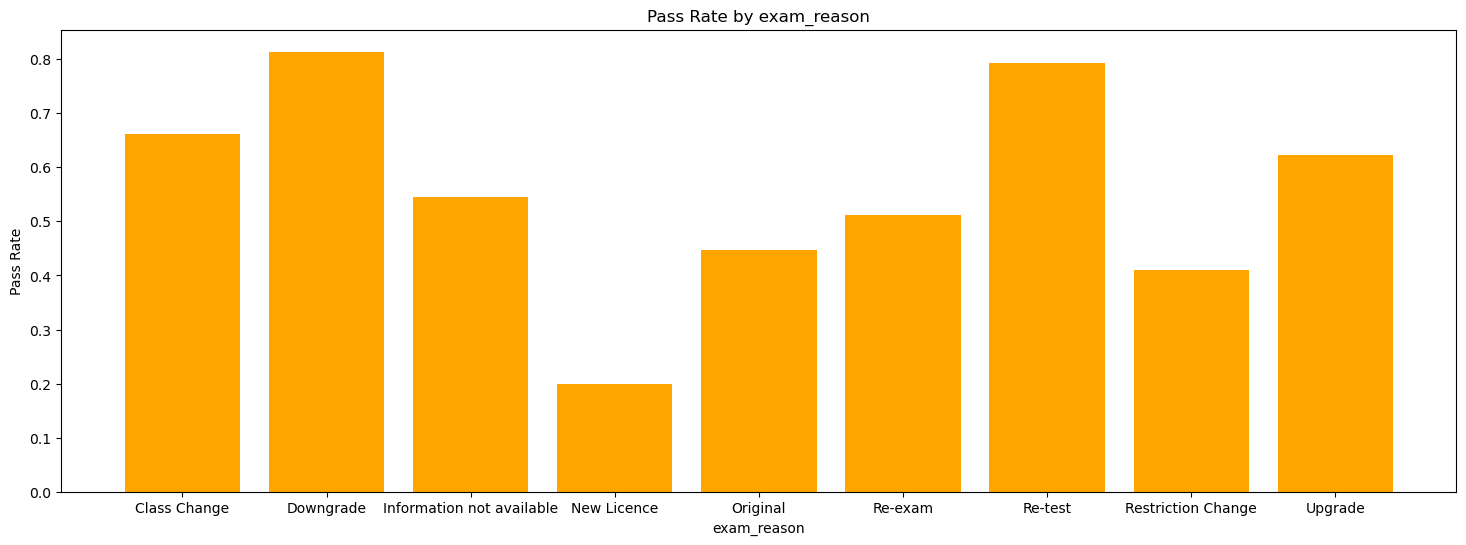

In [130]:
import matplotlib.pyplot as plt


x = pass_rate4.index
y = pass_rate4.values
fig = plt.figure(figsize=(18, 6))

plt.bar(x, y, width=0.8, color='orange')

plt.title('Pass Rate by exam_reason')
plt.xlabel('exam_reason')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by exam_reason, there is significant difference across different reasons.
# Downgrade and Re-test have the highest pass rate, approximately over 80 percent.
# New Licence has the lowest pass rate, approximately 20 percent.
# Mean is 0.5560 and variance is 0.0375. The variance is larger than 0,001, different reasons matter to pass rate.
# So the exam_reason variable is significant to pass rate. 
# We will include this variable to our machine learning process in part 2

In [ ]:
#Variable 5: exam_type

In [131]:
exam_type = dt.groupby('exam_type')['exam_result'].value_counts()
passed = exam_type[exam_type.index.get_level_values('exam_result') == 'Passed'].groupby('exam_type').sum()
failed = exam_type[exam_type.index.get_level_values('exam_result') == 'Failed'].groupby('exam_type').sum()
total = passed + failed
pass_rate5 = passed / total
pass_rate5

exam_type
Motorcycle Skills    0.759927
Road                 0.510491
Name: exam_result, dtype: float64

In [132]:
mean5 = pass_rate5.mean()
var5 = pass_rate5.var()

print("Mean: ", mean5)
print("variance: ", var5)

Mean:  0.6352089529150422
Variation:  0.03110895051031616


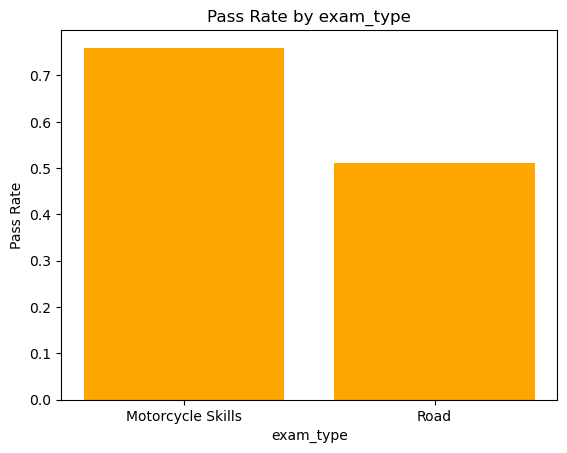

In [133]:
import matplotlib.pyplot as plt

x = pass_rate5.index
y = pass_rate5.values

plt.bar(x, y, width=0.8, color='orange')

plt.title('Pass Rate by exam_type')
plt.xlabel('exam_type')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by exam_type, there is significant difference across different types.
# Motorcycle Skills's pass pass rate is higher than 70 percent, while Road's pass rate is around 50 percent.
# Mean is 0.6352 and variance is 0.0311. The variance is larger than 0,001, different types matter to pass rate.
# So the exam_type variable is significant to pass rate. 
# We will include this variable to our machine learning process in part 2

In [ ]:
#Variable 6: gender

In [134]:
gender = dt.groupby('gender')['exam_result'].value_counts()
passed = gender[gender.index.get_level_values('exam_result') == 'Passed'].groupby('gender').sum()
failed = gender[gender.index.get_level_values('exam_result') == 'Failed'].groupby('gender').sum()
total = passed + failed
pass_rate6 = passed / total
pass_rate6

gender
Female                       0.497320
Information not available    0.706667
Male                         0.531362
Name: exam_result, dtype: float64

In [135]:
mean6 = pass_rate6.mean()
var6 = pass_rate6.var()

print("Mean: ", mean6)
print("variance: ", var6)

Mean:  0.5784495714724094
Variation:  0.012619428328146528


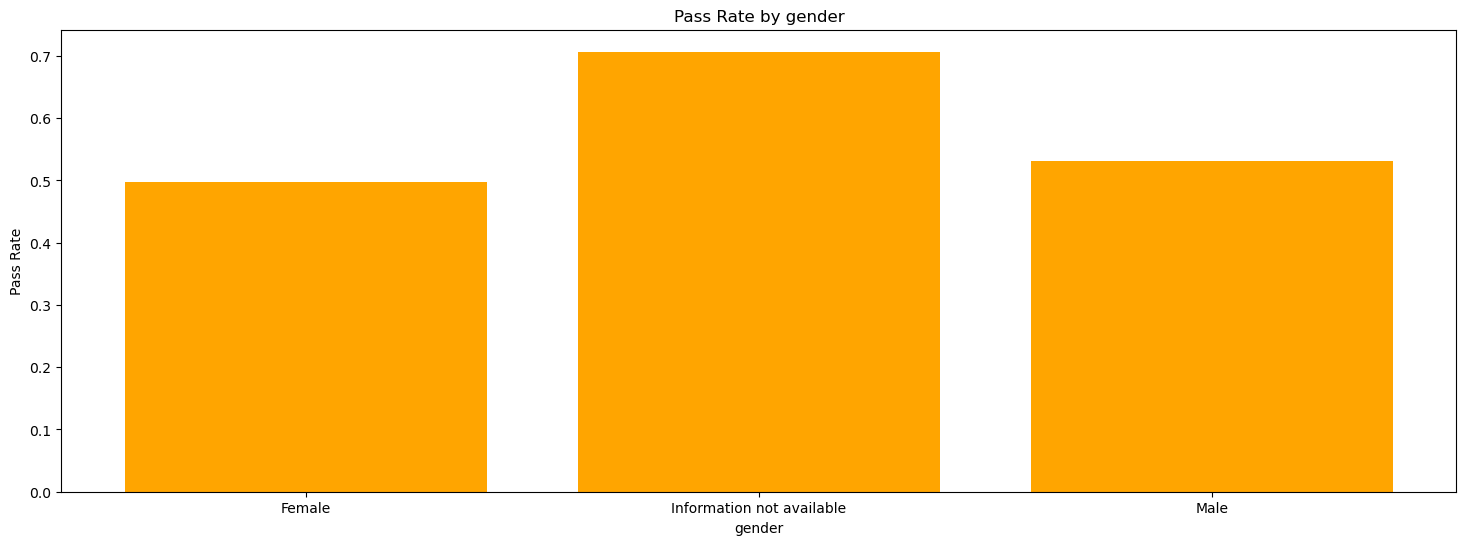

In [136]:
import matplotlib.pyplot as plt


x = pass_rate6.index
y = pass_rate6.values
fig = plt.figure(figsize=(18, 6))

plt.bar(x, y, width=0.8, color='orange')

plt.title('Pass Rate by gender')
plt.xlabel('gender')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by gender, there is significant difference across different genders.
# Mean is 0.5784 and variance is 0.0126. The variance is larger than 0,001, different genders matter to pass rate.
# So the gender variable is significant to pass rate. 
# We will include this variable to our machine learning process in part 2

In [ ]:
#Variable 7: office_municiplaity

In [137]:
office_municiplaity = dt.groupby('office_municiplaity')['exam_result'].value_counts()
passed = office_municiplaity[office_municiplaity.index.get_level_values('exam_result') == 'Passed'].groupby('office_municiplaity').sum()
failed = office_municiplaity[office_municiplaity.index.get_level_values('exam_result') == 'Failed'].groupby('office_municiplaity').sum()
total = passed + failed
pass_rate7 = passed / total
pass_rate7

office_municiplaity
100 MILE HOUSE                   0.651685
ABBOTSFORD                       0.470577
AGASSIZ                          0.522358
ARMSTRONG                             NaN
ASHCROFT                         0.511628
                                   ...   
VERNON                           0.654515
VICTORIA MCKENZIE                0.648523
VICTORIA WHARF                   0.565217
WHISTLER - WESTLAND INSURANCE    0.596563
WILLIAMS LAKE                    0.646446
Name: exam_result, Length: 115, dtype: float64

In [138]:
mean7 = pass_rate7.mean()
var7 = pass_rate7.var()

print("Mean: ", mean7)
print("variance: ", var7)

Mean:  0.6375718887901091
Variation:  0.012189514890912979


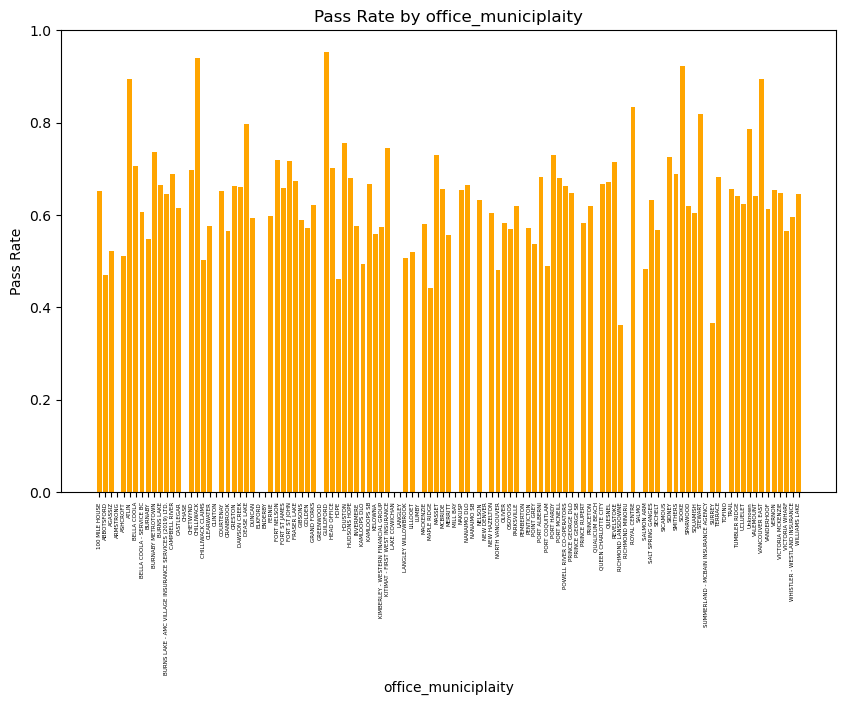

In [139]:
import matplotlib.pyplot as plt


x = pass_rate7.index
y = pass_rate7.values
fig = plt.figure(figsize=(10, 6))

plt.bar(x, y, width=0.8, color='orange')

plt.title('Pass Rate by office_municiplaity')
plt.xlabel('office_municiplaity')
plt.ylabel('Pass Rate')
plt.xticks(rotation=90, fontsize=4)
plt.show()

In [ ]:
# For Pass Rate by office_municiplaity, there is significant difference between different office municiplaities.
# The highest pass rate is higher than 80 percent, while the lowest is lower than 40 percent.
# Mean is 0.6375 and variance is 0.0121. The variance is larger than 0,001, different office municiplaities matter to pass rate.
# So the year variable is significant to pass rate.
# However, we will not include this variable to our machine learning process in part 2 due to too many categories.

In [ ]:
#Variable 8: region

In [140]:
region = dt.groupby('region')['exam_result'].value_counts()
passed = region[region.index.get_level_values('exam_result') == 'Passed'].groupby('region').sum()
failed = region[region.index.get_level_values('exam_result') == 'Failed'].groupby('region').sum()
total = passed + failed
pass_rate8 = passed / total
pass_rate8

region
Lower Mainland       0.471823
North Central        0.665138
Southern Interior    0.566674
Unknown              0.664488
Vancouver Island     0.651121
Name: exam_result, dtype: float64

In [141]:
mean8 = pass_rate8.mean()
var8 = pass_rate8.var()

print("Mean: ", mean8)
print("variance: ", var8)

Mean:  0.603848617823725
Variation:  0.007120221108028374


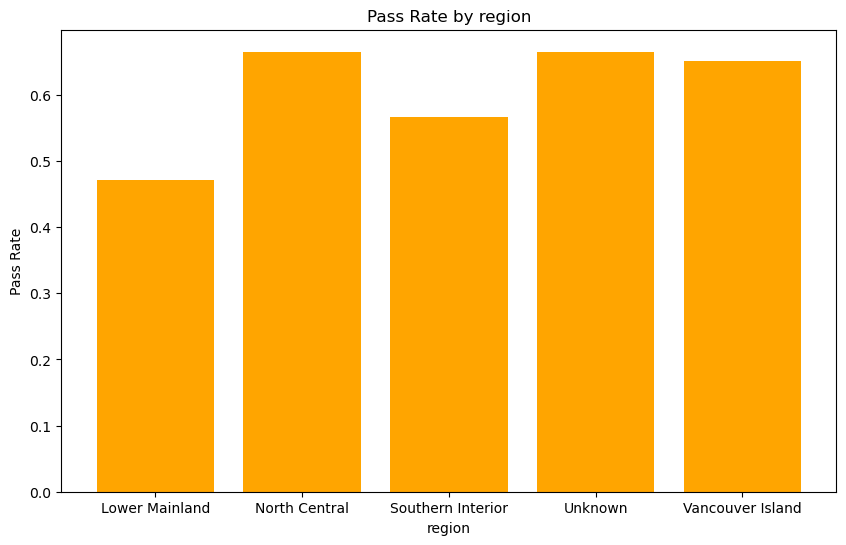

In [142]:
import matplotlib.pyplot as plt


x = pass_rate8.index
y = pass_rate8.values
fig = plt.figure(figsize=(10, 6))

plt.bar(x, y, width=0.8, color='orange')

plt.title('Pass Rate by region')
plt.xlabel('region')
plt.ylabel('Pass Rate')

plt.show()

In [ ]:
# For Pass Rate by region, there is significant difference between different office municiplaities.
# The highest pass rate is higher than 60 percent, while the lowest is lower than 50 percent.
# Mean is 0.6038 and variance is 0.0071. The variance is larger than 0,001, different regions matter to pass rate.
# So the region variable is significant to pass rate.
# We will include this variable to our machine learning process in part 2

In [ ]:
#Variable 9: exam_month_day

In [143]:
dt['exam_month_day'] = pd.to_datetime(dt['exam_date']).dt.strftime('%m-%d')

In [144]:
exam_month_day = dt.groupby('exam_month_day')['exam_result'].value_counts()
passed = exam_month_day[exam_month_day.index.get_level_values('exam_result') == 'Passed'].groupby('exam_month_day').sum()
failed = exam_month_day[exam_month_day.index.get_level_values('exam_result') == 'Failed'].groupby('exam_month_day').sum()
total = passed + failed
pass_rate9 = passed / total
pass_rate9

exam_month_day
01-02    0.508173
01-03    0.515781
01-04    0.517051
01-05    0.534274
01-06    0.522096
           ...   
12-27    0.517241
12-28    0.492317
12-29    0.549584
12-30    0.550489
12-31    0.525293
Name: exam_result, Length: 361, dtype: float64

In [145]:
mean9 = pass_rate9.mean()
var9 = pass_rate9.var()

print("Mean: ", mean9)
print("variance: ", var9)

Mean:  0.5176155428568445
Variation:  0.0003552225901795457


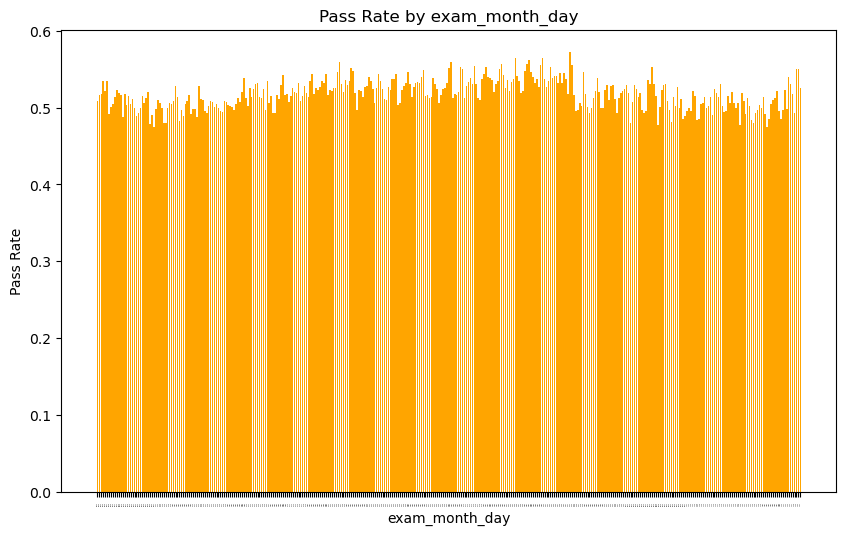

In [146]:
import matplotlib.pyplot as plt


x = pass_rate9.index
y = pass_rate9.values
fig = plt.figure(figsize=(10, 6))

plt.bar(x, y, width=0.8, color='orange')

plt.title('Pass Rate by exam_month_day')
plt.xlabel('exam_month_day')
plt.ylabel('Pass Rate')
plt.xticks(rotation=90, fontsize=1)
plt.show()

In [ ]:
# For Pass Rate by exam_month_day, there is no significant difference across different months and days.
# Mean is 0.5176 and variance is 0.0003. The variance is less than 0,001, different months and days do not matter to pass rate.
# So the exam_month_day variable is NOT significant to pass rate. 
# We will NOT include this variable to our machine learning process in part 2